In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
import os
import shutil
import random

main_folder = "D:\leaf disease\cotton"
train_folder = "training_data"
test_folder = "testing_data"

if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

train_ratio = 0.8 
for category in os.listdir(main_folder):
    category_folder = os.path.join(main_folder, category)
    
    if os.path.isdir(category_folder):
        train_category_folder = os.path.join(train_folder, category)
        test_category_folder = os.path.join(test_folder, category)
        
        if not os.path.exists(train_category_folder):
            os.makedirs(train_category_folder)
        if not os.path.exists(test_category_folder):
            os.makedirs(test_category_folder)
        
        images = [f for f in os.listdir(category_folder) if f.endswith('.jpg')]
        
        random.shuffle(images)
        
        split_index = int(len(images) * train_ratio)
        
        train_images = images[:split_index]
        test_images = images[split_index:]
        
        for img in train_images:
            src = os.path.join(category_folder, img)
            dst = os.path.join(train_category_folder, img)
            shutil.copy(src, dst)
        
        for img in test_images:
            src = os.path.join(category_folder, img)
            dst = os.path.join(test_category_folder, img)
            shutil.copy(src, dst)


In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:\\leaf disease\\cotton\\training_data',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:\\leaf disease\\cotton\\testing_data',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1457 files belonging to 4 classes.
Found 549 files belonging to 4 classes.


AttributeError: 'MapDataset' object has no attribute 'shape'

In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
for batch in train_ds:
    images, labels = batch
    print("Batch shape:", images.shape) 
    print("Labels shape:", labels.shape)
    break 

Batch shape: (32, 256, 256, 3)
Labels shape: (32,)


In [19]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=50,validation_data=validation_ds)

Epoch 1/50
46/46 [==============================] - 11s 206ms/step - loss: 6.9805 - accuracy: 0.6362 - val_loss: 59.3826 - val_accuracy: 0.2750
Epoch 2/50
46/46 [==============================] - 9s 183ms/step - loss: 2.4845 - accuracy: 0.7879 - val_loss: 113.6497 - val_accuracy: 0.2750
Epoch 3/50
46/46 [==============================] - 9s 190ms/step - loss: 1.6569 - accuracy: 0.8346 - val_loss: 49.5134 - val_accuracy: 0.2750
Epoch 4/50
46/46 [==============================] - 9s 185ms/step - loss: 1.1884 - accuracy: 0.8696 - val_loss: 16.9643 - val_accuracy: 0.3370
Epoch 5/50
46/46 [==============================] - 9s 185ms/step - loss: 0.8224 - accuracy: 0.8970 - val_loss: 8.6472 - val_accuracy: 0.4281
Epoch 6/50
46/46 [==============================] - 9s 184ms/step - loss: 0.8977 - accuracy: 0.8991 - val_loss: 13.7621 - val_accuracy: 0.3880
Epoch 7/50
46/46 [==============================] - 9s 186ms/step - loss: 0.7833 - accuracy: 0.9032 - val_loss: 9.3700 - val_accuracy: 0.4663

In [46]:
model.evaluate(validation_ds)

18/18 [==============================] - 4s 53ms/step - loss: 0.0664 - accuracy: 0.9945


[0.06639786064624786, 0.994535505771637]

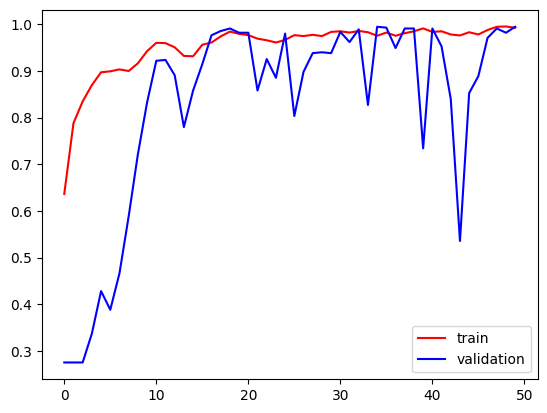

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

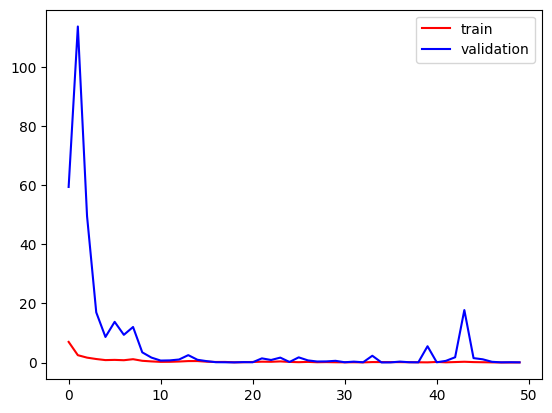

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
model.save_weights("cotton.h5")

In [30]:
import cv2

In [37]:
test_img = cv2.imread('D:\\leaf disease\\cotton\\download.jpeg')

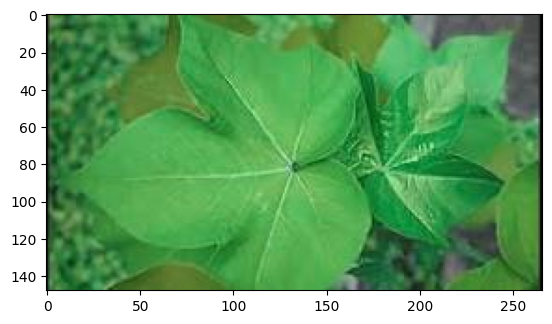

In [38]:
plt.imshow(test_img)

In [39]:
test_img.shape

(148, 266, 3)

In [40]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [44]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0., 1., 0., 0.]], dtype=float32)